In [22]:
import numpy as np
import matplotlib.pyplot as plt

x_max, x_min , y_max, y_min = 0.4,0.2, 1.3, 1.1
x = np.linspace(x_min,x_max,20)
y = np.linspace(y_min,y_max,20)


slope 1: 0.75 slope2: 0.5
slope 1: 1.0 slope2: 0.25


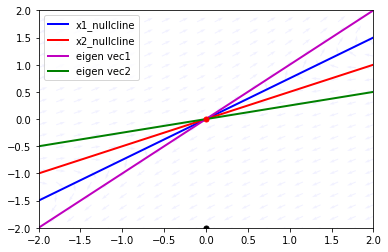

In [103]:
#null clines:
def drawLine (slope, label, color = 'r-', lw = 2):
    plt.plot (x,x*slope , color, label = label, lw = lw)

def plotNullClines (A):
    
    slope1 = -A[0,0] / A[0,1]
    slope2 = -A[1,0] / A[1,1]
    print ("slope 1:" , slope1 , "slope2:", slope2)
    
    drawLine(slope1, label = 'x1_nullcline' , color = 'b-')
    drawLine(slope2, label = 'x2_nullcline', color = 'r-')

    
def plotEigenVectors (e1 , e2):
    
    slope1 = e1[1]/e1[0]
    slope2 = e2[1]/e2[0]
    print ("slope 1:" , slope1 , "slope2:", slope2)
    
    drawLine(slope1, label = 'eigen vec1' , color = 'm-')
    drawLine(slope2, label = 'eigen vec2', color = 'g-')    

def getGrads (A, Xs, Ys):
    out = np.zeros ([len (x), len(y), 2])
    for i in range (len (x)):
        for j in range (len (y)):
            out[i,j] = A @ np.array ([x[i] , y[j]])
            
    return out #np.array ([[A @ np.array ([Xs[i,j] , Ys[i,j]]) for j in range (len (x))] for i in range (len (y))])



plt.figure()
plt.xlim ([x_min , x_max])
plt.ylim ([y_min , y_max])
A = np.array ([[-3, 4], [-1, 2]])
plotNullClines(A)


plotEigenVectors([1, 1], [4, 1])


X1 , Y1  = np.meshgrid(x, y)
out = getGrads(A, X1 , Y1)
DY1, DX1 = out[:,:,1].T, out[:,:,0].T
M = np.hypot (DX1, DY1)
M[M==0] = 1
M = M

DY1, DX1 = DY1/M  , DX1/M
# plt.quiver(X1, Y1, DX1, DY1, pivot='tail', color = 'black')
plt.quiver(X1, Y1, DX1, DY1, pivot='tail', color = '#f1f1ff')

#simulate 
r = np.array ([0, -2])
dt = 1e-1

plt.plot(r[0],r[1],"black", marker = "o", markersize = 5.0)

duration = 100
for i in range (duration):
    new_r = (A @ r.T * dt).T + r 
    hw = 0.03
    hl = 0.04
    if i % (duration//20) == 0:
        hw = 0.5
        hl = 0.8
        
    plt.arrow(r[0] , r[1], new_r[0] - r[0] , new_r[1] - r[1] , color = "#000550", head_width=hw, head_length=hl)
    r = new_r

    
plt.plot([0],[0],"red", marker = "o", markersize = 5.0)
    
plt.legend()

(20, 20)


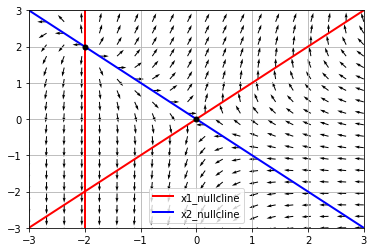

In [88]:
#Q4A

plt.figure()

# plot nullclines x1
plt.plot (x,x , 'r', label = 'x1_nullcline', lw = 2)
plt.plot (y*0-2,y , 'r', lw = 2)
# plot nullclines x2
plt.plot (x,-x , 'b', label = 'x2_nullcline', lw = 2)
plt.plot (y*0+4,y , 'b', lw = 2)

def getGrad (x0,y0):
    return (2 + x0)*(y0 - x0), (4 - x0)*(y0 + x0)

def getGrads (X1,Y1):
    
    out = np.zeros ([len (x), len(y), 2])
#     print (out.shape)
    for i in range (len (x)):
        for j in range (len (y)):
            out[i,j, 0] , out[i,j, 1] = getGrad(X1[i,j] , Y1[i,j])
            
    return out




plt.xlim ([x_min , x_max])
plt.ylim ([y_min , y_max])


X1 , Y1  = np.meshgrid(x, y, indexing= 'ij')
out = getGrads(X1,Y1)
DX1, DY1 = out[:,:,0], out[:,:,1]
print (DX1.shape)
M = np.hypot (DX1, DY1)
# M[M==0] = 1
DY1, DX1 = DY1/M  , DX1/M

plt.quiver(X1, Y1, DX1, DY1, pivot='tail', color = 'black')
    
#plot fixed points
plt.plot([0],[0],"black", marker = "o", markersize = 5.0)
plt.plot([-2],[2],"black", marker = "o", markersize = 5.0)
plt.plot([4],[4],"black", marker = "o", markersize = 5.0)
plt.grid()


plt.legend()

(20, 20)


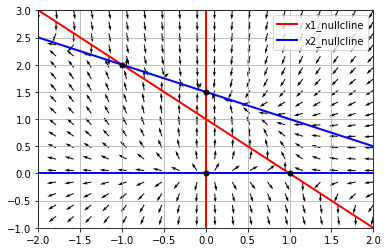

In [80]:
#Q4B

plt.figure()

# plot nullclines x1
plt.plot (x,1-x , 'r', label = 'x1_nullcline', lw = 2)
plt.plot (y*0-0,y , 'r', lw = 2)
# plot nullclines x2
plt.plot (x,3/2-x/2 , 'b', label = 'x2_nullcline', lw = 2)
plt.plot (x,x*0 , 'b', lw = 2)

def getGrad (x0,y0):
    return x0-x0**2-x0*y0, 3*y0 - x0*y0 - 2*(y0**2)

def getGrads (X1,Y1):
    
    out = np.zeros ([len (x), len(y), 2])
#     print (out.shape)
    for i in range (len (x)):
        for j in range (len (y)):
            out[i,j, 0] , out[i,j, 1] = getGrad(X1[i,j] , Y1[i,j])
            
    return out




plt.xlim ([x_min , x_max])
plt.ylim ([y_min , y_max])


X1 , Y1  = np.meshgrid(x, y, indexing= 'ij')
out = getGrads(X1,Y1)
DX1, DY1 = out[:,:,0], out[:,:,1]
print (DX1.shape)
M = np.hypot (DX1, DY1)
# M[M==0] = 1
DY1, DX1 = DY1/M  , DX1/M

plt.quiver(X1, Y1, DX1, DY1, pivot='tail', color = 'black')
    
#plot fixed points
plt.plot([1],[0],"black", marker = "o", markersize = 5.0)
plt.plot([0],[3/2],"black", marker = "o", markersize = 5.0)
plt.plot([-1],[2],"black", marker = "o", markersize = 5.0)
plt.plot([0],[0],"black", marker = "o", markersize = 5.0)
plt.grid()


plt.legend()

(20, 20)


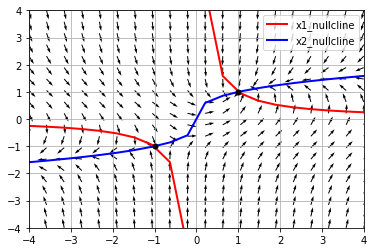

In [99]:
#Q4C

plt.figure()

# plot nullclines x1
plt.plot (x[x>0],1/x[x>0] , 'r', label = 'x1_nullcline', lw = 2)
plt.plot (x[x<0],1/x[x<0] , 'r', lw = 2)

val = x.copy()
val[x>0] = x[x>0]**(1/3)
val[x<0] = -(-x[x<0])**(1/3)

# plot nullclines x2
plt.plot (x,val , 'b', label = 'x2_nullcline', lw = 2)


def getGrad (x0,y0):
    return 1-x0*y0, x0 - y0**3

def getGrads (X1,Y1):
    
    out = np.zeros ([len (x), len(y), 2])
#     print (out.shape)
    for i in range (len (x)):
        for j in range (len (y)):
            out[i,j, 0] , out[i,j, 1] = getGrad(X1[i,j] , Y1[i,j])
            
    return out




plt.xlim ([x_min , x_max])
plt.ylim ([y_min , y_max])


X1 , Y1  = np.meshgrid(x, y, indexing= 'ij')
out = getGrads(X1,Y1)
DX1, DY1 = out[:,:,0], out[:,:,1]
print (DX1.shape)
M = np.hypot (DX1, DY1)
# M[M==0] = 1
DY1, DX1 = DY1/M  , DX1/M

plt.quiver(X1, Y1, DX1, DY1, pivot='tail', color = 'black')
    
#plot fixed points
plt.plot([1],[1],"black", marker = "o", markersize = 5.0)
plt.plot([-1],[-1],"black", marker = "o", markersize = 5.0)
plt.grid()


plt.legend()

(20, 20)


No handles with labels found to put in legend.


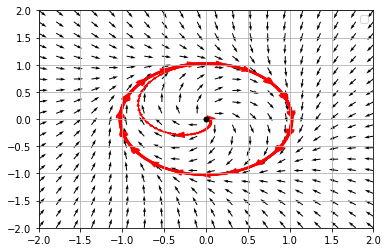

In [112]:
#Q6

plt.figure()

def getGrad (x0,y0):
    return (x0+y0)-x0*(x0**2+y0**2), -(x0-y0)-y0*(x0**2+y0**2)

def getGrads (X1,Y1):
    
    out = np.zeros ([len (x), len(y), 2])
#     print (out.shape)
    for i in range (len (x)):
        for j in range (len (y)):
            out[i,j, 0] , out[i,j, 1] = getGrad(X1[i,j] , Y1[i,j])
            
    return out




plt.xlim ([x_min , x_max])
plt.ylim ([y_min , y_max])


X1 , Y1  = np.meshgrid(x, y, indexing= 'ij')
out = getGrads(X1,Y1)
DX1, DY1 = out[:,:,0], out[:,:,1]
print (DX1.shape)
M = np.hypot (DX1, DY1)
# M[M==0] = 1
DY1, DX1 = DY1/M  , DX1/M

plt.quiver(X1, Y1, DX1, DY1, pivot='tail', color = 'black')
    
#plot fixed points
plt.plot([0],[0],"black", marker = "o", markersize = 5.0)
plt.grid()

dt 
r = np.array ([0.01,0.01])
duration = 1000
for i in range (duration):
    new_r = np.array (getGrad(r[0] , r[1]))*dt + r 
    hw = 0.03
    hl = 0.04
    if i % (duration//30) == 0:
        hw = 0.1
        hl = 0.1
        
    plt.arrow(r[0] , r[1], new_r[0] - r[0] , new_r[1] - r[1] , color = "r", head_width=hw, head_length=hl)
    r = new_r


plt.legend()

(20, 20)


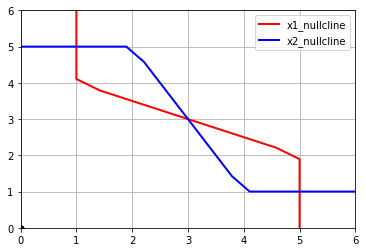

In [121]:
#Q5
import numpy as np
import matplotlib.pyplot as plt

x_max, x_min , y_max, y_min = 6,0, 6, 0
x = np.linspace(x_min,x_max,20)
y = np.linspace(y_min,y_max,20)

plt.figure()

new_val = y.copy()
for i in range (len (new_val)):
    if y[i] >= 4:
        new_val[i] = 1
    elif 2 <= y[i] < 4:
        new_val[i] = -2*y[i] + 9
    else:
        new_val[i] = 5
    

# plot nullclines x1
plt.plot (new_val, y , 'r', label = 'x1_nullcline', lw = 2)


new_val = x.copy()
for i in range (len (new_val)):
    if x[i] >= 4:
        new_val[i] = 1
    elif 2 <= x[i] < 4:
        new_val[i] = -2*x[i] + 9
    else:
        new_val[i] = 5
    

# plot nullclines x2
plt.plot (x,new_val , 'b', label = 'x2_nullcline', lw = 2)


def NOT (x):
    if x >= 4:
        return 1
    elif 2 <= x < 4:
        return -2*x+9
    else:
        return 5

def getGrad (x0,y0):
    return NOT(y0) - x0 , NOT(x0) - y0

def getGrads (X1,Y1):
    
    out = np.zeros ([len (x), len(y), 2])
#     print (out.shape)
    for i in range (len (x)):
        for j in range (len (y)):
            out[i,j, 0] , out[i,j, 1] = getGrad(X1[i,j] , Y1[i,j])
            
    return out




plt.xlim ([x_min , x_max])
plt.ylim ([y_min , y_max])


X1 , Y1  = np.meshgrid(x, y, indexing= 'ij')
out = getGrads(X1,Y1)
DX1, DY1 = out[:,:,0], out[:,:,1]
print (DX1.shape)
M = np.hypot (DX1, DY1)
# M[M==0] = 1
DY1, DX1 = DY1/M  , DX1/M

# plt.quiver(X1, Y1, DX1, DY1, pivot='tail', color = 'black')
    
#plot fixed points
plt.plot([0],[0],"black", marker = "o", markersize = 5.0)
plt.grid()

plt.legend()

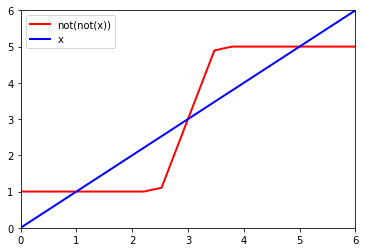

In [127]:
#Q5
import numpy as np
import matplotlib.pyplot as plt

x_max, x_min , y_max, y_min = 6,0, 6, 0
x = np.linspace(x_min,x_max,20)
y = np.linspace(y_min,y_max,20)

plt.figure()

new_val = x.copy()
for i in range (len (new_val)):
    if x[i] >= 3.5:
        new_val[i] = 5
    elif 2.5 <= y[i] < 3.5:
        new_val[i] = 4*y[i] - 9
    else:
        new_val[i] = 1
    

# plot nullclines x1
plt.plot (x, new_val , 'r', label = 'not(not(x))', lw = 2)

# plot nullclines x2
plt.plot (x, x , 'b', label = 'x', lw = 2)


plt.xlim ([x_min , x_max])
plt.ylim ([y_min , y_max])
plt.legend()

(20, 20)


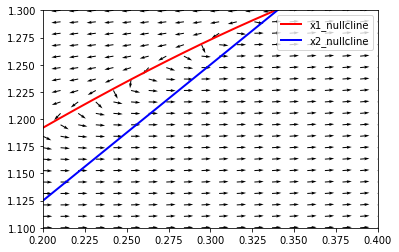

In [23]:
#Q4C

plt.figure()
I = 1

# plot nullclines x1
plt.plot (x,x-x**3 + I , 'r', label = 'x1_nullcline', lw = 2)


# plot nullclines x2
plt.plot (x,(x+0.7)/0.8 , 'b', label = 'x2_nullcline', lw = 2)


def getGrad (x0,y0):
    return x0 - x0**3 - y0 + I, 0.08 * (x0 + 0.7 - 0.8 * y0)

def getGrads (X1,Y1):
    
    out = np.zeros ([len (x), len(y), 2])
#     print (out.shape)
    for i in range (len (x)):
        for j in range (len (y)):
            out[i,j, 0] , out[i,j, 1] = getGrad(X1[i,j] , Y1[i,j])
            
    return out




plt.xlim ([x_min , x_max])
plt.ylim ([y_min , y_max])


X1 , Y1  = np.meshgrid(x, y, indexing= 'ij')
out = getGrads(X1,Y1)
DX1, DY1 = out[:,:,0], out[:,:,1]
print (DX1.shape)
M = np.hypot (DX1, DY1)
# M[M==0] = 1
DY1, DX1 = DY1/M  , DX1/M

plt.quiver(X1, Y1, DX1, DY1, pivot='tail', color = 'black')
    


plt.legend()